# Phase 1: Feature Extraction using CNN

In [1]:
import numpy as np
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import PIL

# Load directories
training_dir = "../Pneumonia-Detection-Using-Deep-Learning/chest_xray/train/"
valid_dir = "../Pneumonia-Detection-Using-Deep-Learning/chest_xray/val/"
test_dir = "../Pneumonia-Detection-Using-Deep-Learning/chest_xray/test/"

# Load images using ImageDataGenerator
training_generator = ImageDataGenerator(rescale=1/255)
data_train = training_generator.flow_from_directory(training_dir, target_size=(120, 120), batch_size=8, class_mode="binary")
validation_generator = ImageDataGenerator(rescale=1/255)
data_valid = validation_generator.flow_from_directory(valid_dir, target_size=(120, 120), batch_size=8, class_mode="binary")
test_generator = ImageDataGenerator(rescale=1/255)
data_test = test_generator.flow_from_directory(test_dir, target_size=(120, 120), batch_size=8, class_mode="binary")

# Define CNN model for feature extraction
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(120, 120, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(512, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten()
])

# Freeze the CNN layers
cnn_model.trainable = False

# Extract features using CNN
def extract_features(generator, model):
    features = []
    labels = []
    for inputs_batch, labels_batch in generator:
        features_batch = model.predict(inputs_batch)
        features.append(features_batch)
        labels.append(labels_batch)
        if len(features) * generator.batch_size >= generator.samples:
            break
    return np.vstack(features), np.hstack(labels)

# Get training, validation, and test features and labels
train_features, train_labels = extract_features(data_train, cnn_model)
val_features, val_labels = extract_features(data_valid, cnn_model)
test_features, test_labels = extract_features(data_test, cnn_model)

# Save extracted features and labels for later use
np.save("train_features.npy", train_features)
np.save("train_labels.npy", train_labels)
np.save("val_features.npy", val_features)
np.save("val_labels.npy", val_labels)
np.save("test_features.npy", test_features)
np.save("test_labels.npy", test_labels)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


C:\Users\bened\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━

# Phase 2: Training using Random Forest

In [2]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier  # Random Forest for classification
from sklearn.metrics import accuracy_score, classification_report

# Load the extracted features and labels
train_features = np.load("train_features.npy")
train_labels = np.load("train_labels.npy")
val_features = np.load("val_features.npy")
val_labels = np.load("val_labels.npy")
test_features = np.load("test_features.npy")
test_labels = np.load("test_labels.npy")

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(train_features, train_labels)

# Evaluate the model on validation and test sets
val_predictions = rf_model.predict(val_features)
print("Validation Accuracy:", accuracy_score(val_labels, val_predictions))
print("Validation Classification Report:\n", classification_report(val_labels, val_predictions))

test_predictions = rf_model.predict(test_features)
print("Test Accuracy:", accuracy_score(test_labels, test_predictions))
print("Test Classification Report:\n", classification_report(test_labels, test_predictions))

# Function to preprocess a new image for prediction
def preprocess_image(image_path):
    img = PIL.Image.open(image_path).convert('RGB')  # Convert to RGB if not already
    img = img.resize((120, 120))  # Resize image to 120x120
    img_array = np.array(img) / 255.0  # Normalize the pixel values to [0, 1]
    
    # Ensure image has 3 channels and add batch dimension
    if img_array.shape[-1] != 3:
        print(f"Warning: Image has {img_array.shape[-1]} channels, converting to RGB.")
        img_array = np.stack([img_array] * 3, axis=-1)  # Convert grayscale to RGB by replicating the single channel
    
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension: (1, 120, 120, 3)
    return img_array

# Function to extract features from the new image using the CNN model
def extract_features_from_cnn(cnn_model, image_array):
    # Check if the shape is correct before passing to the model
    print("Image array shape:", image_array.shape)  # Should be (1, 120, 120, 3)
    features = cnn_model.predict(image_array)  # Predict with CNN model
    return features

Validation Accuracy: 0.5625
Validation Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.12      0.22         8
         1.0       0.53      1.00      0.70         8

    accuracy                           0.56        16
   macro avg       0.77      0.56      0.46        16
weighted avg       0.77      0.56      0.46        16

Test Accuracy: 0.8205128205128205
Test Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.55      0.70       234
         1.0       0.78      0.98      0.87       390

    accuracy                           0.82       624
   macro avg       0.87      0.77      0.78       624
weighted avg       0.85      0.82      0.81       624



# Phase 3: Prediction 

Processed image shape: (1, 120, 120, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction for the new image (0 = Normal, 1 = Pneumonia): 1.0


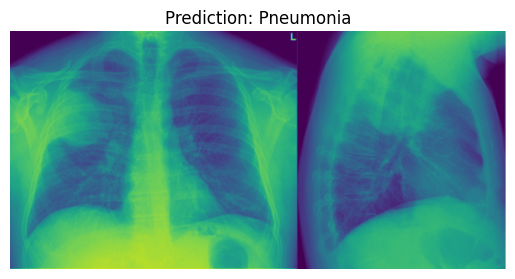

In [15]:
import matplotlib.pyplot as plt
import PIL.Image

# Load and preprocess a new X-ray image
new_image_path = "../Pneumonia-Detection-Using-Deep-Learning/pneumonic.jpg"  # Update to the correct path
if os.path.exists(new_image_path):
    new_img_array = preprocess_image(new_image_path)  # Preprocess image
    print("Processed image shape:", new_img_array.shape)  # Check if the shape is (1, 120, 120, 3)
    new_image_features = extract_features_from_cnn(cnn_model, new_img_array)  # Extract features
    
    # Predict using the Random Forest model
    prediction = rf_model.predict(new_image_features)
    print("Prediction for the new image (0 = Normal, 1 = Pneumonia):", prediction[0])

    # Display the image along with the prediction
    img = PIL.Image.open(new_image_path)
    plt.imshow(img)
    plt.title(f"Prediction: {'Pneumonia' if prediction[0] == 1 else 'Normal'}")
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print("File not found:", new_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


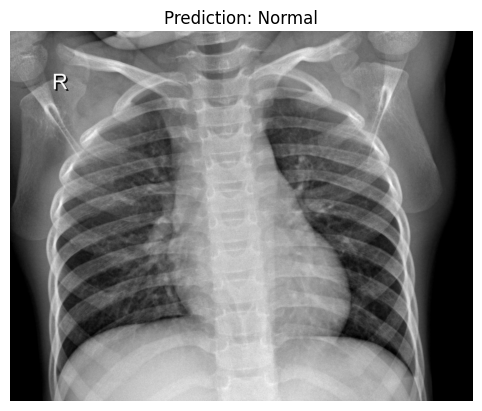

Image: ../Pneumonia-Detection-Using-Deep-Learning/chest_xray/test/NORMAL\NORMAL2-IM-0370-0001.jpeg
The probability of pneumonia is: 0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


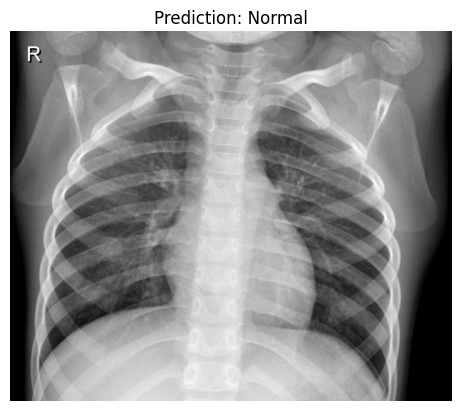

Image: ../Pneumonia-Detection-Using-Deep-Learning/chest_xray/test/NORMAL\NORMAL2-IM-0309-0001.jpeg
The probability of pneumonia is: 0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


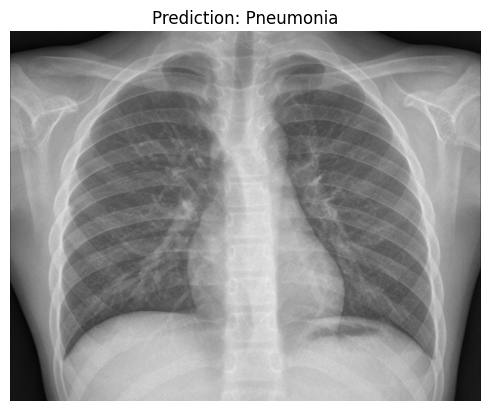

Image: ../Pneumonia-Detection-Using-Deep-Learning/chest_xray/test/NORMAL\IM-0017-0001.jpeg
The probability of pneumonia is: 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


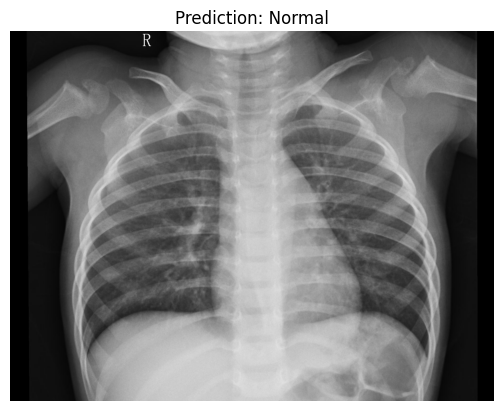

Image: ../Pneumonia-Detection-Using-Deep-Learning/chest_xray/test/NORMAL\NORMAL2-IM-0027-0001.jpeg
The probability of pneumonia is: 0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


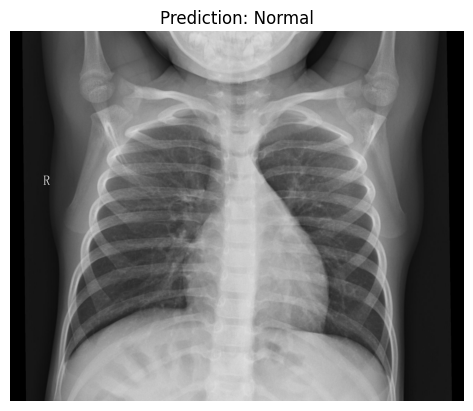

Image: ../Pneumonia-Detection-Using-Deep-Learning/chest_xray/test/NORMAL\NORMAL2-IM-0060-0001.jpeg
The probability of pneumonia is: 0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


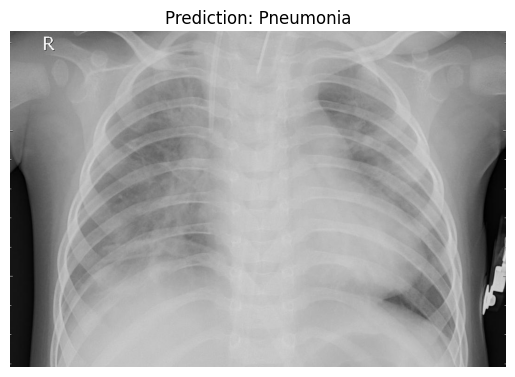

Image: ../Pneumonia-Detection-Using-Deep-Learning/chest_xray/test/PNEUMONIA\person101_bacteria_483.jpeg
The probability of pneumonia is: 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


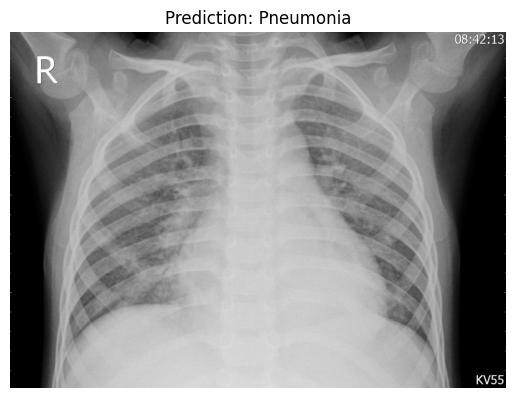

Image: ../Pneumonia-Detection-Using-Deep-Learning/chest_xray/test/PNEUMONIA\person78_virus_140.jpeg
The probability of pneumonia is: 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


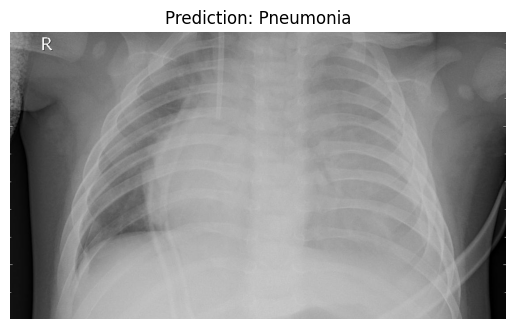

Image: ../Pneumonia-Detection-Using-Deep-Learning/chest_xray/test/PNEUMONIA\person152_bacteria_722.jpeg
The probability of pneumonia is: 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


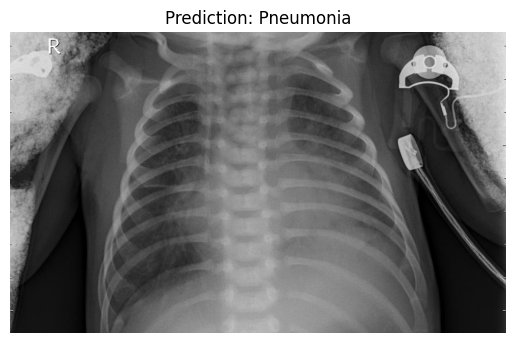

Image: ../Pneumonia-Detection-Using-Deep-Learning/chest_xray/test/PNEUMONIA\person78_bacteria_385.jpeg
The probability of pneumonia is: 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


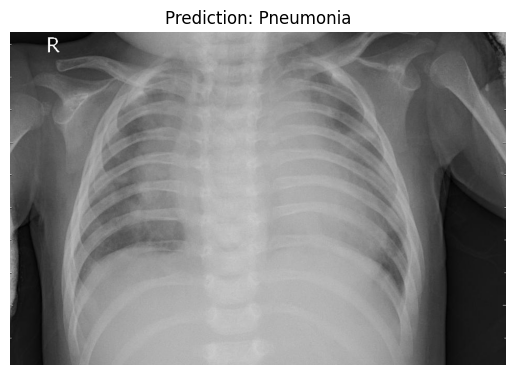

Image: ../Pneumonia-Detection-Using-Deep-Learning/chest_xray/test/PNEUMONIA\person112_bacteria_538.jpeg
The probability of pneumonia is: 1.0


In [13]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# Directory paths for NORMAL and PNEUMONIA images in validation folder
normal_dir = '../Pneumonia-Detection-Using-Deep-Learning/chest_xray/test/NORMAL'  # Update with the correct path
pneumonia_dir = '../Pneumonia-Detection-Using-Deep-Learning/chest_xray/test/PNEUMONIA'  # Update with the correct path

# Function to load and preprocess images
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(120, 120))  # Resize to 120x120
    img_array = image.img_to_array(img) / 255.0  # Convert to array and normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, 120, 120, 3)
    return img_array

# Function to extract features and predict with the CNN model
def extract_features_from_cnn(cnn_model, img_array):
    features = cnn_model.predict(img_array)
    return features

# Choose 5 random images from each category
normal_images = random.sample(os.listdir(normal_dir), 5)  # 5 random normal images
pneumonia_images = random.sample(os.listdir(pneumonia_dir), 5)  # 5 random pneumonia images

# Combine the two sets of images
image_paths = [os.path.join(normal_dir, img) for img in normal_images] + [os.path.join(pneumonia_dir, img) for img in pneumonia_images]

# Create a list for predictions
predictions = []

# Loop over the selected images, load, preprocess, and predict
for img_path in image_paths:
    img_array = load_and_preprocess_image(img_path)  # Preprocess the image
    features = extract_features_from_cnn(cnn_model, img_array)  # Extract features from CNN
    prediction = rf_model.predict(features)  # Predict with Random Forest model
    predictions.append(prediction[0])  # Store the prediction

    # Display the image with the prediction
    img = image.load_img(img_path)  # Load image again for display
    plt.imshow(img)
    plt.title(f"Prediction: {'Pneumonia' if prediction[0] == 1 else 'Normal'}")
    plt.axis('off')  # Hide axes
    plt.show()

    print(f"Image: {img_path}")
    print(f"The probability of pneumonia is: {prediction[0]}")
